In [ ]:
# plot_logs.py

import csv
import matplotlib.pyplot as plt
import sys
from collections import defaultdict


In [39]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

def visualize_combined(csv_file):
    time_data = []
    raw = defaultdict(lambda: {})
    stages = set()

    with open(csv_file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            time_data.append(float(row['time_s']))
            for col, val in row.items():
                if col == 'time_s': continue
                stage, metric = col.replace('stage','').split('_',1)
                stages.add(stage)
                raw[stage].setdefault(metric, []).append(float(val) if val else 0.0)

    for stage in sorted(stages, key=lambda s: int(s)):
        plt.figure(figsize=(8, 4))
        # tasks_running
        tasks = raw[stage].get('tasks_running', [])
        # servers count
        servers = raw[stage].get('servers', [])
        plt.plot(time_data, tasks, linestyle='-', linewidth=2, label='Tasks Running')
        plt.plot(time_data, servers, linestyle='--', linewidth=1.5, label='Servers Available')
        plt.xlabel('Time (s)')
        plt.ylabel('Count')
        plt.title(f'Stage {stage}: Tasks vs Servers')
        plt.legend(loc='upper left')
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig(f'stage{stage}_tasks_servers.png', dpi=300)
        plt.show()


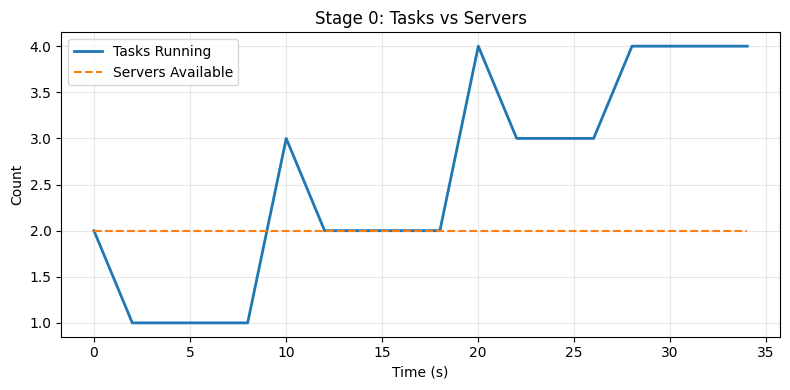

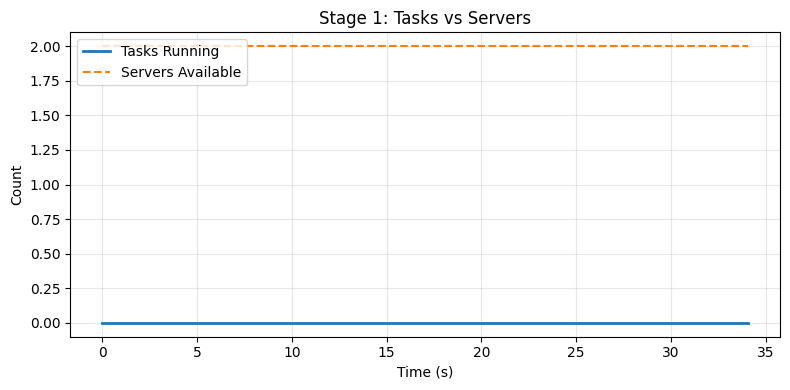

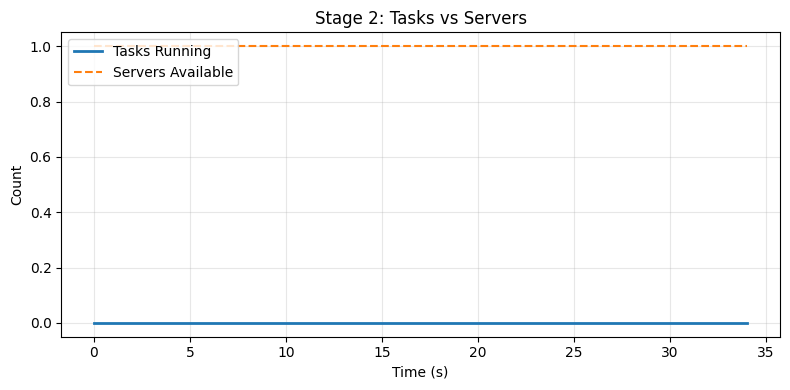

In [95]:
visualize_combined('metrics_log.csv')